<a href="https://colab.research.google.com/github/Mirsath/HSI/blob/main/HSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h style='color:cyan'>CUNY-Lehman College</br>
Irsath Azeez
</h>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h style='color:Green'> Extracting the data and Meta Associated to the data set provided to dataframe.</h>

In [2]:
# CDC = Centers for Disease Control and Prevention
# ACS = American Community Survey

ACS_metadata  = pd.read_excel('ACS_Data_Dictionary.xlsx')
CDC_metadata  = pd.read_excel('CDC_Places_Data_Dictionary.xlsx')
Hospital_metadata  = pd.read_excel('Hospital_Compare_Data_Dictionary.xlsx')

In [3]:
population = pd.read_csv('ACS_2020_Table_01_Population.csv')
race = pd.read_csv('ACS_2020_Table_01_Race.csv')
education = pd.read_csv('ACS_2020_Table_08_Education.csv')
poverty = pd.read_csv('ACS_2020_Table _10_HH_Poverty.csv')
health_insurance = pd.read_csv('ACS_2020_Table _22_Health_Insurance.csv')
CDC_health_outcome = pd.read_csv('CDC_Places_2020 Health_Outcomes.csv')
hospital_comparison = pd.read_csv('Hospital_Compare_2020.csv')




In [4]:
ACS_metadata.set_index('Variable', inplace=True)

In [5]:
Hospital_metadata.head()    # displays the first 5 rows of the hospital meta data

,Order,Variable,Measure,Units,Definition
0,1,hospital_compare_id,Hospital Compare ID,label,Identification number assigned by Hospital Com...
1,2,year,Year,year,Data year
2,3,hco_name,HCO Name,label,Hospital or healthcare organization (HCO) name
3,4,address,Address,address,Address
4,5,city,City,city,City


In [6]:
CDC_metadata.head() # displays the first 5 rows of the CDC meta data

,Order,Variable,Measure,Units,Definition
0,1,zcta5,ZCTA,label,Zip code tabulation area (ZCTA)
1,2,totalpopulation,population,individuals,Total Population of Census 2010
2,3,cervical_crudeprev,crude prevalence rate,per 1000,Model-based estimate for crude prevalence of c...
3,4,dental_crudeprev,crude prevalence rate,per 1000,Model-based estimate for crude prevalence of v...
4,5,sleep_crudeprev,crude prevalence rate,per 1000,Model-based estimate for crude prevalence of s...


<h style='color:Green'> Since we focus on Bronx City, NY, we first pulled all the zipcodes that associated to the NYC from CDC health report data (range: 10001-11120)</h>

In [7]:
NYC_zipcodes = CDC_health_outcome[(CDC_health_outcome['zcta5'] >= 10001) & (CDC_health_outcome['zcta5'] <= 11120)]

In [8]:
NYC_zipcodes

,zcta5,totalpopulation,cervical_crudeprev,dental_crudeprev,sleep_crudeprev,colon_screen_crudeprev,corem_crudeprev,corew_crudeprev,mammouse_crudeprev,teethlost_crudeprev,...,depression_crudeprev,diabetes_crudeprev,ghlth_crudeprev,highchol_crudeprev,kidney_crudeprev,lpa_crudeprev,mhlth_crudeprev,obesity_crudeprev,phlth_crudeprev,stroke_crudeprev
26,11101,25484,83.2,59.9,40.2,57.5,19.6,17.7,78.7,19.2,...,14.8,11.5,21.7,26.3,2.8,31.9,13.9,26.6,12.8,3.0
34,10312,59304,86.6,72.3,41.5,65.8,24.7,26.5,79.5,12.2,...,17.7,8.5,15.3,30.1,2.3,26.3,13.3,28.0,11.0,2.6
63,10993,4769,84.7,63.7,41.2,60.2,22.2,19.9,75.3,17.0,...,16.4,12.5,22.3,32.5,3.3,31.6,13.6,31.1,13.8,3.6
159,10019,42870,86.1,76.9,35.7,71.9,27.7,25.6,82.9,7.4,...,18.6,6.1,11.2,27.4,2.0,16.8,11.1,18.1,8.1,1.9
184,10460,57311,81.2,50.0,44.1,52.7,17.3,16.7,80.7,25.8,...,17.7,15.9,34.5,29.6,4.0,43.3,18.5,36.4,18.1,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,10075,26121,89.3,82.6,32.5,76.7,30.9,28.0,83.0,5.6,...,19.9,5.7,9.3,30.7,2.1,14.2,10.0,17.3,7.7,2.0
9228,10128,60453,88.5,80.7,33.8,74.8,30.3,27.7,83.5,5.9,...,19.7,5.5,9.6,28.6,1.9,14.8,10.6,17.6,7.6,1.8
9258,10998,3122,88.4,74.1,37.8,66.5,24.9,26.7,78.9,10.9,...,19.6,8.4,14.9,31.4,2.4,27.1,13.9,31.3,11.6,2.7
9271,10314,85510,84.9,69.6,42.4,63.8,23.9,25.0,79.1,13.9,...,16.5,9.8,17.4,30.8,2.6,29.1,13.3,27.8,11.8,2.9


In [9]:
CDC_health_outcome.columns      # displays the columns of the CDC health outcome data

Index(['zcta5', 'totalpopulation', 'cervical_crudeprev', 'dental_crudeprev',
       'sleep_crudeprev', 'colon_screen_crudeprev', 'corem_crudeprev',
       'corew_crudeprev', 'mammouse_crudeprev', 'teethlost_crudeprev',
       'access2_crudeprev', 'arthritis_crudeprev', 'binge_crudeprev',
       'bphigh_crudeprev', 'bpmed_crudeprev', 'cancer_crudeprev',
       'casthma_crudeprev', 'chd_crudeprev', 'checkup_crudeprev',
       'cholscreen_crudeprev', 'copd_crudeprev', 'csmoking_crudeprev',
       'depression_crudeprev', 'diabetes_crudeprev', 'ghlth_crudeprev',
       'highchol_crudeprev', 'kidney_crudeprev', 'lpa_crudeprev',
       'mhlth_crudeprev', 'obesity_crudeprev', 'phlth_crudeprev',
       'stroke_crudeprev'],
      dtype='object')

<h style='color:Green'> Our main focus on 'Heart Decease'. So we pulled all the features that link/cause to this decease</h>

In [10]:
NYC = NYC_zipcodes.loc[:, ['zcta5', 'totalpopulation','bphigh_crudeprev',
                        'highchol_crudeprev', 'depression_crudeprev',
                        'obesity_crudeprev', 'stroke_crudeprev']]

<h style='color:Green'> filter the bronx zipcodes as focus only the Bronx</h>

In [11]:
Bronx = NYC[(NYC['zcta5'] >= 10451) & (NYC['zcta5'] <= 10475)]

In [12]:
Bronx = Bronx.sort_values(by=['zcta5'])     # sorting the data by zip code
Bronx.reset_index(drop=True, inplace=True)  # resetting the index

<h style='color:Green'> calculating the average from the Bronx which enclosed with all sub-area and printing the results </h>

In [13]:
# average death rate per 1000 in 2010 for Bronx city by CDC data
average_BP_crudeprev = Bronx['bphigh_crudeprev'].mean()
average_HC_crudeprev = Bronx['highchol_crudeprev'].mean()
average_dep_crudeprev = Bronx['depression_crudeprev'].mean()
average_obesity_crudeprev = Bronx['obesity_crudeprev'].mean()
average_str_crudeprev = Bronx['stroke_crudeprev'].mean()
Bronx_total_population = Bronx['totalpopulation'].sum()

In [14]:
print("Average blood pressure death in the Bronx: ", np.round(average_BP_crudeprev,2))      # rounding the average death rate to 2 decimal places
print("Average high cholesterol death in the Bronx: ", np.round(average_HC_crudeprev,2))
print("Average depression death in the Bronx: ", np.round(average_dep_crudeprev,2))
print("Average obesity death in the Bronx: ", np.round(average_obesity_crudeprev,2))
print("Average stroke death in the Bronx: ", np.round(average_str_crudeprev,2))
print("Total population in the Bronx: ", Bronx_total_population)

Average blood pressure death in the Bronx:  32.88
Average high cholesterol death in the Bronx:  30.31
Average depression death in the Bronx:  16.98
Average obesity death in the Bronx:  32.9
Average stroke death in the Bronx:  3.82
Total population in the Bronx:  1382480


<h style='color:Green'> creating a dictionary format of the results with key for visualization purpose</h>

In [15]:
bar_data = {'Blood Pressure': average_BP_crudeprev, 'High Cholesterol': average_HC_crudeprev,
            'Depression': average_dep_crudeprev, 'Obesity': average_obesity_crudeprev,
            'Stroke': average_str_crudeprev}

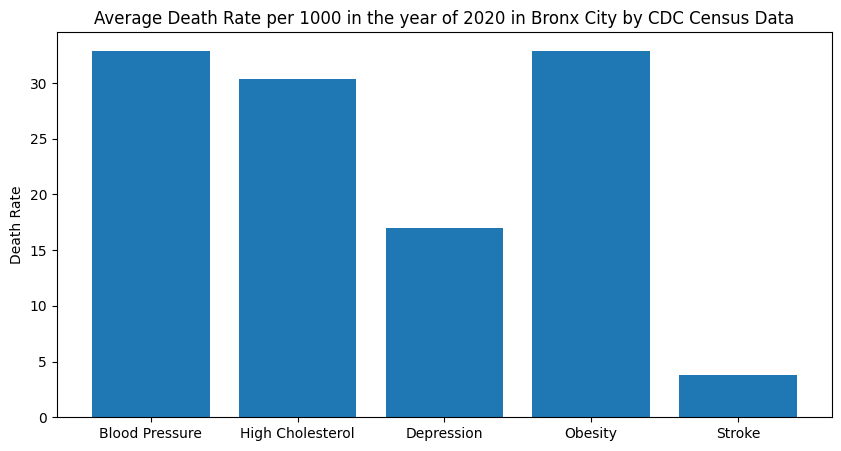

In [16]:
plt.figure(figsize=(10,5))
plt.ylabel('Death Rate')
plt.bar(list(bar_data), list(bar_data.values()), align='center')
plt.title('Average Death Rate per 1000 in the year of 2020 in Bronx City by CDC Census Data')
plt.show()


<h style='color:Green'> working on other data provided by American Community survey. Pulling all the bronx related datas</h>

In [17]:
Bronx_Population = population[(population['zcta5'] >= 10451) & (population['zcta5'] <= 10475)]
Bronx_Race = race[(race['zcta5'] >= 10451) & (race['zcta5'] <= 10475)]
Bronx_Education = education[(education['zcta5'] >= 10451) & (education['zcta5'] <= 10475)]
Bronx_Poverty = poverty[(poverty['zcta5'] >= 10451) & (poverty['zcta5'] <= 10475)]
Bronx_Health_Insurance = health_insurance[(health_insurance['zcta5'] >= 10451) & (health_insurance['zcta5'] <= 10475)]

<h style='color:Green'> resetting and sorting the data in zipcode order</h>

In [18]:
Bronx_Population.reset_index(drop=True, inplace=True)
Bronx_Race.reset_index(drop=True, inplace=True)
Bronx_Education.reset_index(drop=True, inplace=True)
Bronx_Poverty.reset_index(drop=True, inplace=True)
Bronx_Health_Insurance.reset_index(drop=True, inplace=True)

Bronx_Population = Bronx_Population.sort_values(by=['zcta5'])
Bronx_Race = Bronx_Race.sort_values(by=['zcta5'])
Bronx_Education = Bronx_Education.sort_values(by=['zcta5'])
Bronx_Poverty = Bronx_Poverty.sort_values(by=['zcta5'])
Bronx_Health_Insurance = Bronx_Health_Insurance.sort_values(by=['zcta5'])


In [19]:
# Bronx_Race.isnull()

In [20]:
# Criteria = ['Population', 'Race', 'Education', 'Poverty', 'Health Insurance']
# print(Bronx_Education.shape)
# print(Bronx_Race.shape)
# print(Bronx_Population.shape)
# print(Bronx_Poverty.shape)
# print(Bronx_Health_Insurance.shape)

Bronx_avg_population = {}       # creating a dictionary to store the average values of each criteria
Bronx_avg_Education = {}
Bronx_avg_Race = {}
Bronx_avg_Poverty = {}
Bronx_avg_Health_Insurance = {}

# shapes are different for each criterias.

# getting the average values for each criteria's columns values with the key. This is for plotting purposes
for i in range(1,Bronx_Population.shape[1]):
    Bronx_avg_population[Bronx_Population.columns.values[i]] =  Bronx_Population[Bronx_Population.columns.values[i]].mean()

for i in range(1,Bronx_Race.shape[1]):
    Bronx_avg_Race[Bronx_Race.columns.values[i]] =  Bronx_Race[Bronx_Race.columns.values[i]].mean()

for i in range(1,Bronx_Education.shape[1]):
    Bronx_avg_Education[Bronx_Education.columns.values[i]] =  Bronx_Education[Bronx_Education.columns.values[i]].mean()

for i in range(1,Bronx_Poverty.shape[1]):
    Bronx_avg_Poverty[Bronx_Poverty.columns.values[i]] =  Bronx_Poverty[Bronx_Poverty.columns.values[i]].mean()

for i in range(1,Bronx_Health_Insurance.shape[1]):
    Bronx_avg_Health_Insurance[Bronx_Health_Insurance.columns.values[i]] =  Bronx_Health_Insurance[Bronx_Health_Insurance.columns.values[i]].mean()



<h style='color:Green'> Sorting the criteria and then convert them into dictionary </h>

In [21]:
Bronx_avg_Education = dict(sorted(Bronx_avg_Education.items(), key=lambda x: x[1], reverse=False))
Bronx_avg_population = dict(sorted(Bronx_avg_population.items(), key=lambda x: x[1], reverse=True))
Bronx_avg_Poverty = dict(sorted(Bronx_avg_Poverty.items(), key=lambda x: x[1], reverse=True))
Bronx_avg_Race = dict(sorted(Bronx_avg_Race.items(), key=lambda x: x[1], reverse=True))
Bronx_avg_Health_Insurance = dict(sorted(Bronx_avg_Health_Insurance.items(), key=lambda x: x[1], reverse=False))

In [22]:
# ACS_metadata.loc['b01001_002', 'Signals Definition']

<h style='color:green'>Bronx area average population group(top 10)</h>

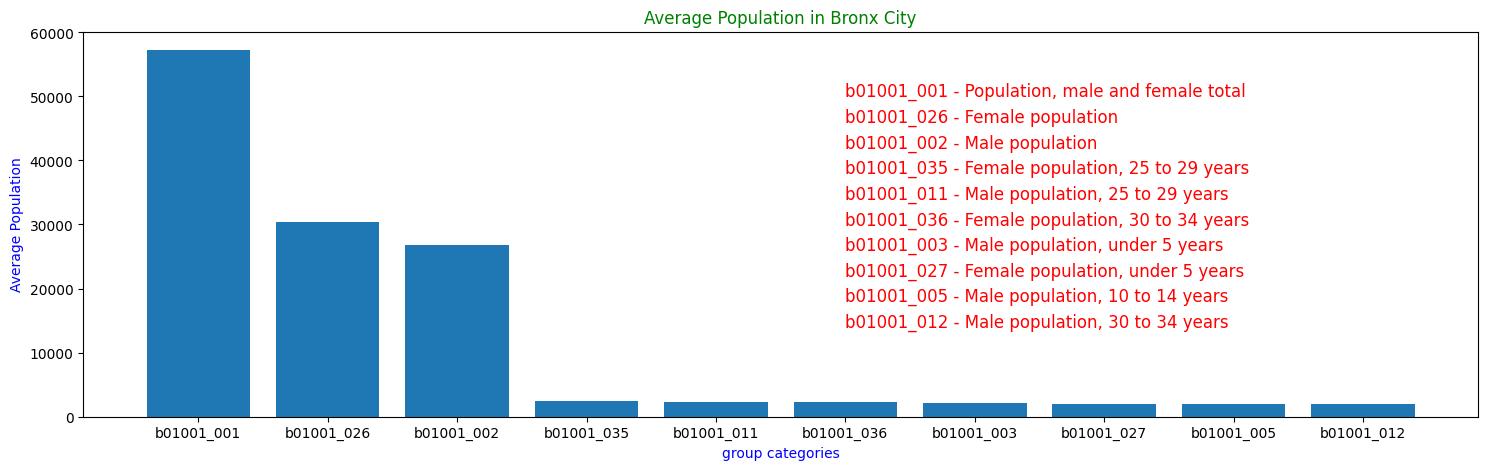

In [23]:
highest_10_population = dict(list(Bronx_avg_population.items())[:10])   # converted them into list for slicing purposes and converted into dictionary
plt.figure(figsize=(18,5))
plt.xlabel('group categories', color='blue')
plt.ylabel('Average Population',color='blue')
plt.bar(list(highest_10_population), list(highest_10_population.values()), align='center')
plt.title('Average Population in Bronx City', color='green')
y_axis = 50000
for i,key in zip(range(10),highest_10_population.keys()):
    plt.text(5, y_axis, (key + ' - ' + ACS_metadata.loc[key,'Signals Definition']), fontsize=12,color='red')
    y_axis = y_axis - 4000


<h style='color:green'>Bronx City average Education attaintment (least 10)</h>

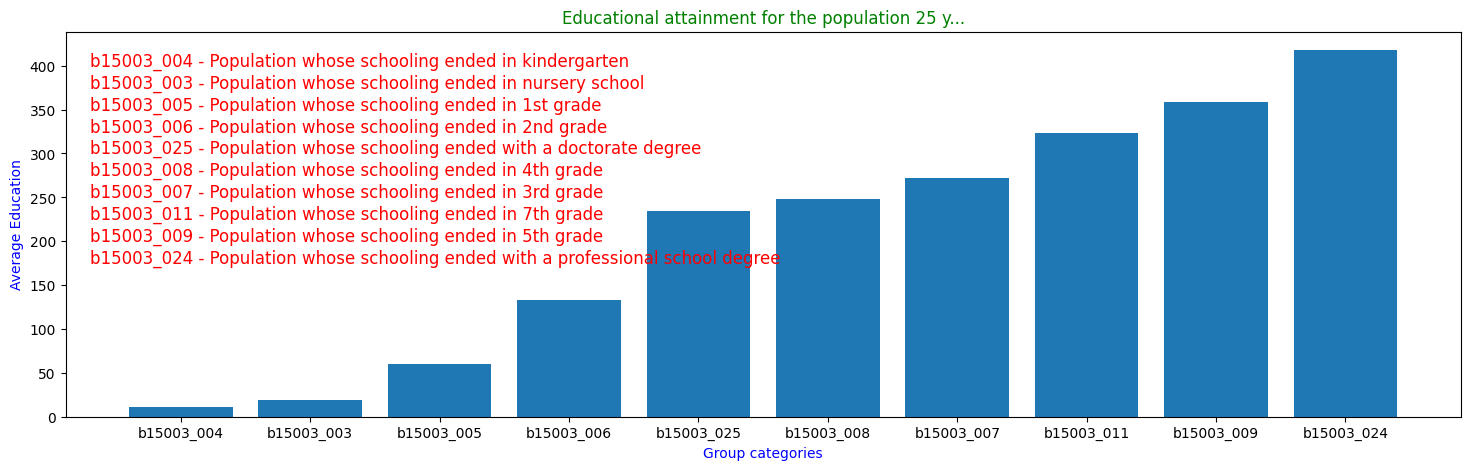

In [24]:
lowest_10_education = dict(list(Bronx_avg_Education.items())[:10])
plt.figure(figsize=(18,5))
plt.xlabel('Group categories', color='blue')
plt.ylabel('Average Education',color='blue')
plt.bar(list(lowest_10_education), list(lowest_10_education.values()), align='center')
plt.title('Educational attainment for the population 25 y...', color='green')
y_axis = 400
for i,key in zip(range(10),lowest_10_education.keys()):
    plt.text(-0.7, y_axis, (key + ' - ' + ACS_metadata.loc[key,'Signals Definition']), fontsize=12,color='red')
    y_axis = y_axis - 25

In [25]:
# ACS_metadata[ACS_metadata['Table'] == 'ACS 2020 Table 01 Population']
ACS_metadata['Table'].unique()

array(['ACS 2020 Table 01 Population', 'ACS 2020 Table 01 Race',
       'ACS 2020 Table 06 Transportation to Work',
       'ACS 2020 Table 08 Education', 'ACS 2020 Table 10 HH Income',
       'ACS 2020 Table 10 HH Poverty',
       'ACS 2020 Table 22 Health Insurance'], dtype=object)

In [26]:
(ACS_metadata[ACS_metadata['Table'] == 'ACS 2020 Table 01 Population']).head()

,Table,Signals Definition,ACS Definition
Variable,,,
zcta5,ACS 2020 Table 01 Population,Zip code tablulation area (ZCTA),Zip code tablulation area (ZCTA)
b01001_001,ACS 2020 Table 01 Population,"Population, male and female total","Sex by age, total population, total"
b01001_002,ACS 2020 Table 01 Population,Male population,"Sex by age, total population, total, male"
b01001_003,ACS 2020 Table 01 Population,"Male population, under 5 years","Sex by age, total population, total, male, und..."
b01001_004,ACS 2020 Table 01 Population,"Male population, 5 to 9 years","Sex by age, total population, total, male, 5 t..."


<h style='color:green'>Bronx City average Poverty (least 10)</h>

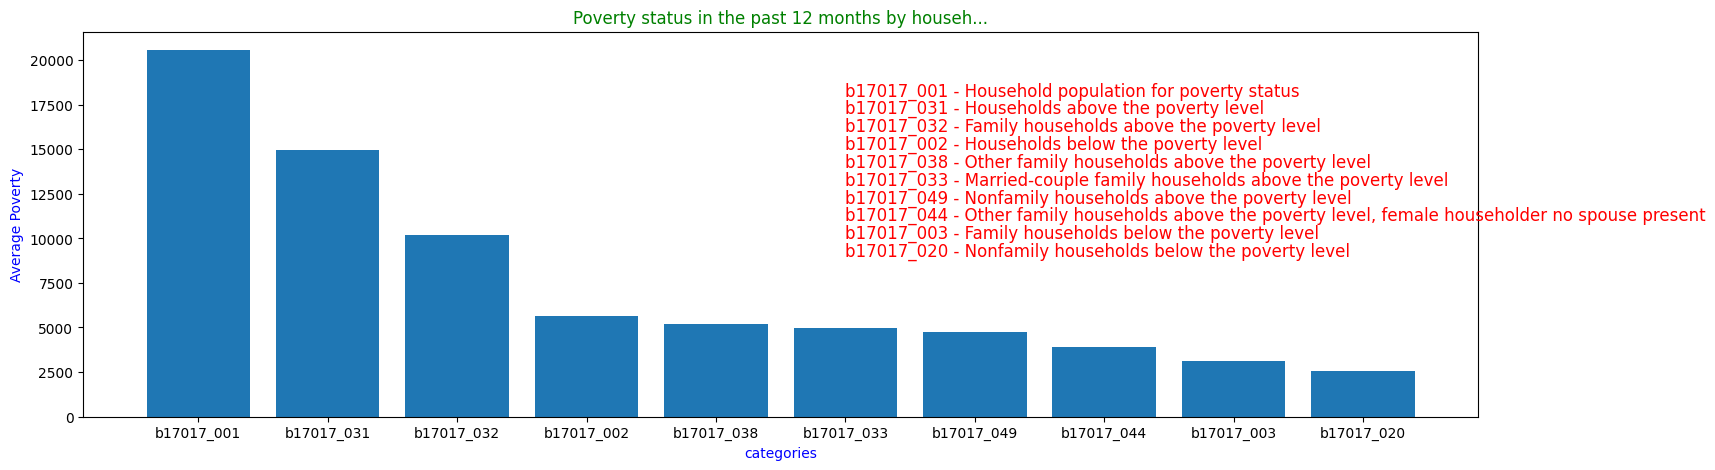

In [27]:
highest_10_poverty = dict(list(Bronx_avg_Poverty.items())[:10])
plt.figure(figsize=(18,5))
plt.xlabel('categories', color='blue')
plt.ylabel('Average Poverty',color='blue')
plt.bar(list(highest_10_poverty), list(highest_10_poverty.values()), align='center')
plt.title('Poverty status in the past 12 months by househ...', color='green')
# print(plt.axis())
y_axis = 18000
for i,key in zip(range(10),highest_10_poverty.keys()):
    plt.text(5, y_axis, (key + ' - ' + ACS_metadata.loc[key,'Signals Definition']), fontsize=12,color='red')
    y_axis = y_axis - 1000

<h style='color:green'>Bronx City average Health Insurance (least 10)</h>

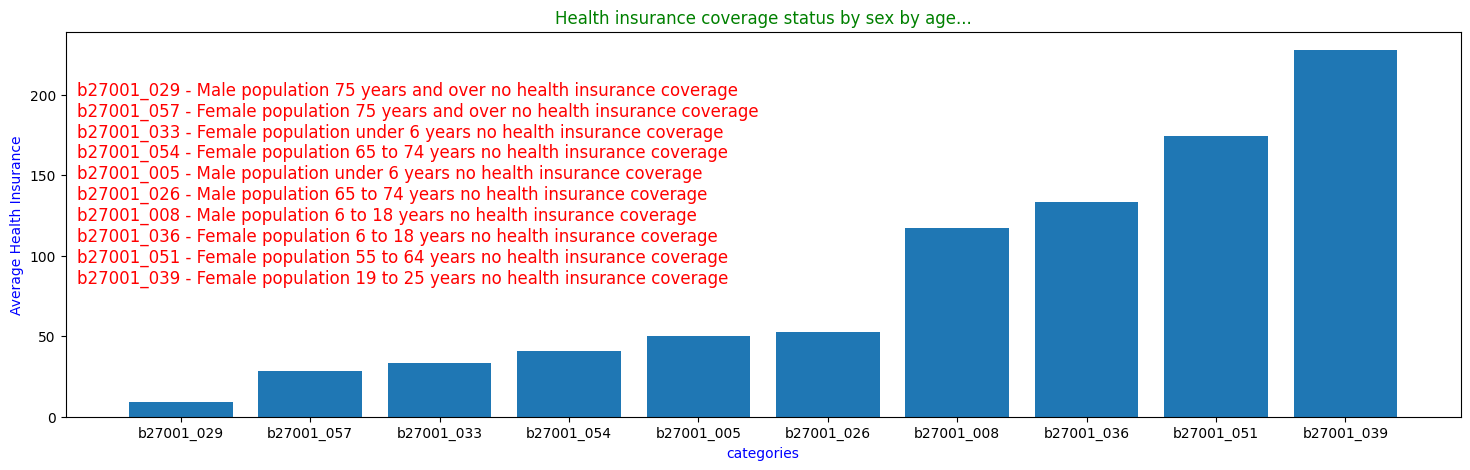

In [28]:
least_10_Healthinsurance = dict(list(Bronx_avg_Health_Insurance.items())[:10])
plt.figure(figsize=(18,5))
plt.xlabel('categories', color='blue')
plt.ylabel('Average Health Insurance',color='blue')
plt.bar(list(least_10_Healthinsurance), list(least_10_Healthinsurance.values()), align='center')
plt.title('Health insurance coverage status by sex by age...', color='green')
y_axis = 200
for i,key in zip(range(10),least_10_Healthinsurance.keys()):
    plt.text(-0.8, y_axis, (key + ' - ' + ACS_metadata.loc[key,'Signals Definition']), fontsize=12,color='red')
    y_axis = y_axis - 13

<h style='color:green'>Bronx City average Race info - least 10</h>

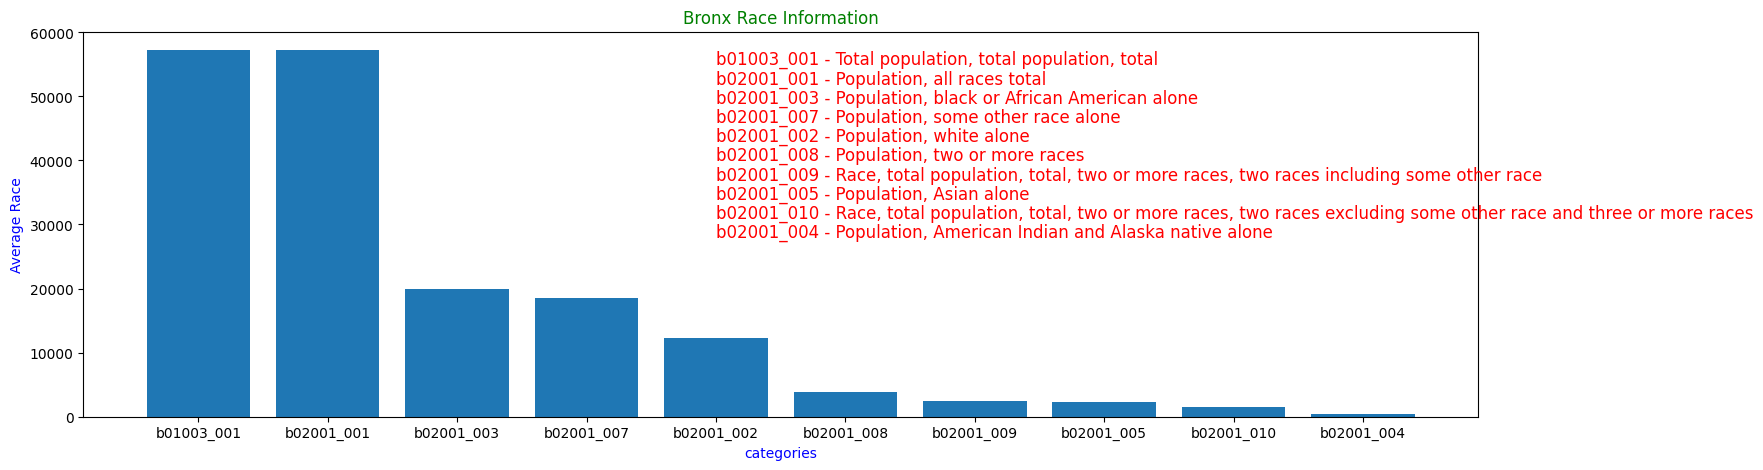

In [29]:
Highest_10_Race = dict(list(Bronx_avg_Race.items())[:10])
plt.figure(figsize=(18,5))
plt.xlabel('categories', color='blue')
plt.ylabel('Average Race',color='blue')
plt.bar(list(Highest_10_Race), list(Highest_10_Race.values()), align='center')
plt.title('Bronx Race Information', color='green')
# print(plt.axis())
y_axis = 55000
for i,key in zip(range(10),Highest_10_Race.keys()):
    plt.text(4, y_axis, (key + ' - ' + ACS_metadata.loc[key,'Signals Definition']), fontsize=12,color='red')
    y_axis = y_axis - 3000